In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [50]:
df = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10,12/01/2010 08:26,100.0,1.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,25,12/01/2010 08:26,200.0,2.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,12,12/01/2010 08:26,150.0,3.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,35,12/01/2010 08:26,300.0,4.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,50,12/01/2010 08:26,500.0,5.0,United Kingdom


In [46]:
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'TotalSpend': [100, 200, 150, 300, 500, 600, 100, 250, 400, 350],
    'FrequencyOfVisits': [5, 10, 6, 12, 20, 18, 3, 8, 15, 13],
    'NumberOfstocksPurchased': [10, 25, 12, 35, 50, 60, 8, 30, 45, 40]
}

In [37]:
df = pd.DataFrame(data)

In [38]:
X = df.drop(['CustomerID'], axis=1)



In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [41]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

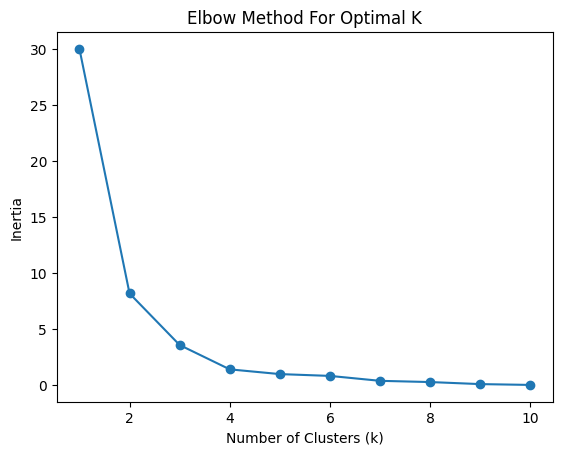

In [42]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [47]:
kmeans = KMeans(n_clusters=4, random_state=44)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [44]:
print(df[['CustomerID', 'Cluster']])

   CustomerID  Cluster
0           1        1
1           2        0
2           3        1
3           4        0
4           5        2
5           6        2
6           7        1
7           8        0
8           9        0
9          10        0


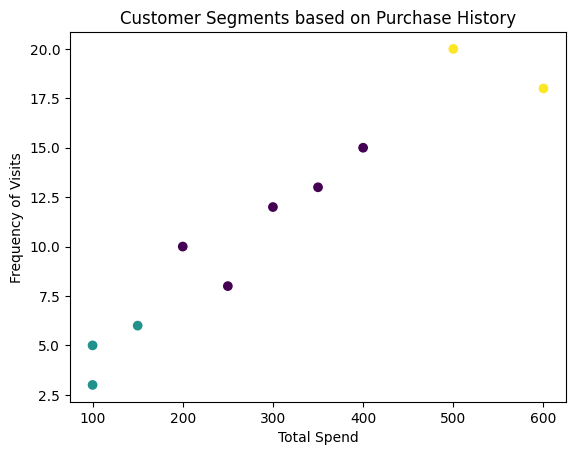

In [45]:
plt.scatter(df['TotalSpend'], df['FrequencyOfVisits'], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments based on Purchase History')
plt.xlabel('Total Spend')
plt.ylabel('Frequency of Visits')
plt.show()